# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cityname=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [4]:
units = "imperial"
set_count = 1
record_count = 0
for i, city in enumerate(cities):
    if i % 50 == 0 and i >= 50:
        set_count = set_count +1
        record_count = 1
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count = record_count +1
    query_url = f"{url}appid={weather_api_key}&units{units}&q={city}"
    post_response = requests.get(query_url).json()         
    
    try:
        cityname.append(post_response['name'])
        lat.append(post_response['coord']['lat'])
        lng.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        humidity.append(post_response['main']['humidity'])
        cloudiness.append(post_response['clouds']['all'])
        wind_speed.append(post_response['wind']['speed'])
        country.append(post_response['sys']['country'])
        date.append(time.ctime(post_response['dt']))
    except KeyError:
        print("City not found...Skipping...")
    

Processing Record 0 of Set 1 | fortuna
Processing Record 1 of Set 1 | waddan
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mukhen
Processing Record 6 of Set 1 | taolanaro
City not found...Skipping...
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | bolungarvik
City not found...Skipping...
Processing Record 9 of Set 1 | sattahip
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | zavodouspenskoye
Processing Record 12 of Set 1 | savalou
Processing Record 13 of Set 1 | bosaso
Processing Record 14 of Set 1 | dali
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | burhanpur
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | sal rei
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | rio grande
Processing Record 22 of Set 1 | nizhneyansk
City not

Processing Record 37 of Set 4 | mar del plata
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | amderma
City not found...Skipping...
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | ciudad bolivar
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | mikhaylovskoye
Processing Record 44 of Set 4 | charters towers
Processing Record 45 of Set 4 | honghu
Processing Record 46 of Set 4 | inta
Processing Record 47 of Set 4 | uhlove
Processing Record 48 of Set 4 | mattru
Processing Record 49 of Set 4 | schio
Processing Record 50 of Set 4 | ayolas
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | yabassi
Processing Record 3 of Set 5 | gaspe
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | mao
Processing Record 8 of Set 5 | bac lieu
Processing Record 9 of Set 5 | rajapur
Processing Record 10 of Set 5 | ca

Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | labuhan
Processing Record 30 of Set 8 | sharlyk
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | malindi
Processing Record 33 of Set 8 | mehran
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | santa catarina de tepehuanes
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | kushiro
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | kroya
Processing Record 40 of Set 8 | halalo
City not found...Skipping...
Processing Record 41 of Set 8 | antsohihy
Processing Record 42 of Set 8 | jabiru
City not found...Skipping...
Processing Record 43 of Set 8 | road town
Processing Record 44 of Set 8 | balimo
City not found...Skipping...
Processing Record 45 of Set 8 | norman wells
Processing Record 46 of Set 8 | qasigiannguit
Processing Record 47 of Set 8 | takoradi
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | leni

Processing Record 16 of Set 12 | killam
Processing Record 17 of Set 12 | shiyan
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | conchas
Processing Record 20 of Set 12 | narsaq
Processing Record 21 of Set 12 | dunedin
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | wuwei
Processing Record 24 of Set 12 | mehamn
Processing Record 25 of Set 12 | nurota
Processing Record 26 of Set 12 | agadir
Processing Record 27 of Set 12 | boma
Processing Record 28 of Set 12 | lavumisa
Processing Record 29 of Set 12 | solnechnyy
Processing Record 30 of Set 12 | fatikchhari
City not found...Skipping...
Processing Record 31 of Set 12 | braganca
Processing Record 32 of Set 12 | hami
Processing Record 33 of Set 12 | port-cartier
Processing Record 34 of Set 12 | tokmak
Processing Record 35 of Set 12 | mersin
Processing Record 36 of Set 12 | esfahan
Processing Record 37 of Set 12 | turukhansk
Processing Record 38 of Set 12 | the valley
Processing Record 39

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_dt ={"City":cityname,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
             "Wind Speed":wind_speed,"Country":country,"Date":date}
weather_df =pd.DataFrame(weather_dt)
weather_df.to_csv('output_data/cities.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,283.71,100,90,3.09,US,Thu Apr 29 00:01:55 2021
1,Waddān,29.1614,16.1390,302.19,10,87,3.30,LY,Thu Apr 29 00:01:55 2021
2,Jamestown,42.0970,-79.2353,290.15,94,75,3.60,US,Wed Apr 28 23:57:44 2021
3,Atuona,-9.8000,-139.0333,299.67,72,31,5.52,PF,Thu Apr 29 00:01:55 2021
4,Punta Arenas,-53.1500,-70.9167,277.15,87,75,7.20,CL,Thu Apr 29 00:01:56 2021


In [26]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,20.879310,19.965145,289.781640,71.224599,55.787879,3.257594
std,32.566189,89.017664,10.352197,23.347289,38.039119,2.155156
min,-54.800000,-175.200000,264.350000,5.000000,0.000000,0.140000
25%,-5.092500,-56.900000,282.150000,62.000000,17.000000,1.830000
50%,25.383300,23.950000,291.150000,77.000000,75.000000,2.790000
75%,47.674000,100.335400,298.150000,88.000000,90.000000,4.120000
max,78.218600,179.316700,313.430000,100.000000,100.000000,13.890000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [27]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,283.71,100,90,3.09,US,Thu Apr 29 00:01:55 2021
1,Waddān,29.1614,16.1390,302.19,10,87,3.30,LY,Thu Apr 29 00:01:55 2021
2,Jamestown,42.0970,-79.2353,290.15,94,75,3.60,US,Wed Apr 28 23:57:44 2021
3,Atuona,-9.8000,-139.0333,299.67,72,31,5.52,PF,Thu Apr 29 00:01:55 2021
4,Punta Arenas,-53.1500,-70.9167,277.15,87,75,7.20,CL,Thu Apr 29 00:01:56 2021


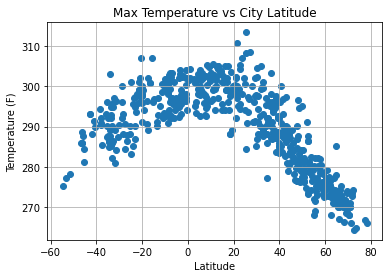

In [24]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("Max Temperature vs City Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemperaturevsCityLatitude.png")

plt.show()

## Latitude vs. Humidity Plot

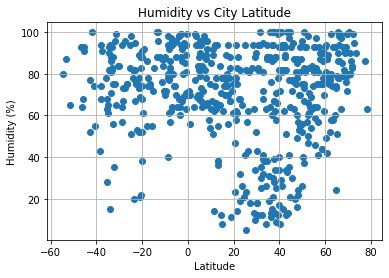

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

plt.title("Humidity vs City Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("HumidityvsCityLatitude.png")

plt.show()

## Latitude vs. Cloudiness Plot

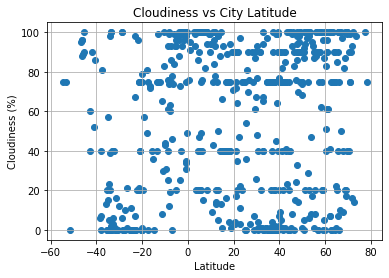

In [29]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

plt.title("Cloudiness vs City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CloudinessvsCityLatitude.png")

plt.show()

## Latitude vs. Wind Speed Plot

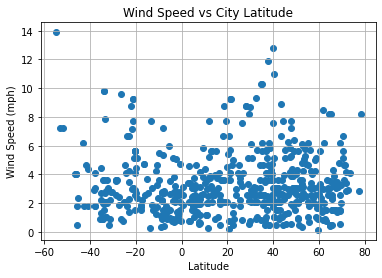

In [31]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

plt.title("Wind Speed vs City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeedvsCityLatitude.png")

plt.show()

## Linear Regression

In [33]:
north_weather =weather_df.loc[weather_df["Lat"] >= 0]

south_weather =weather_df.loc[weather_df["Lat"] < 0]

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.savefig("WindSpeedvsCityLatitude.png")

plt.show()

The r-value is: 0.46937863826630627


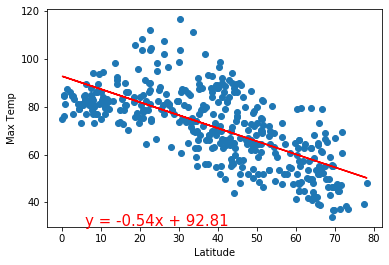

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


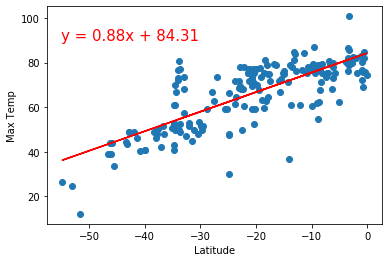

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


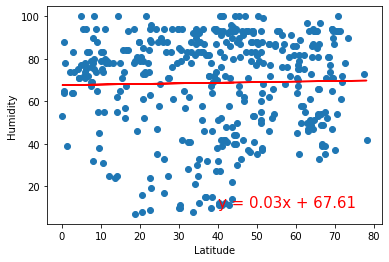

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


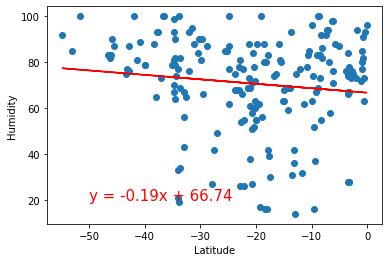

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


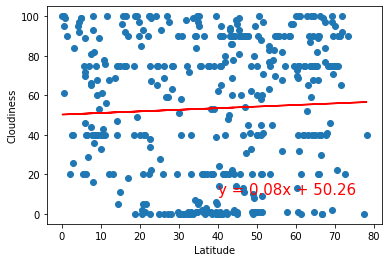

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


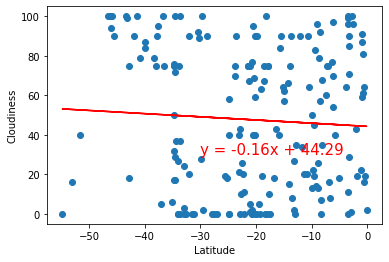

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


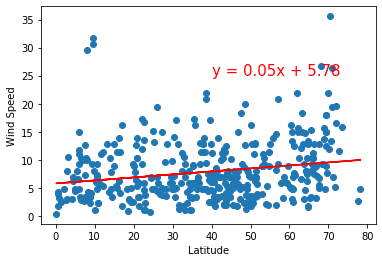

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


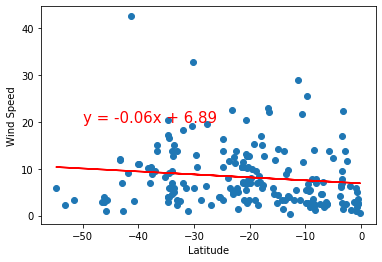